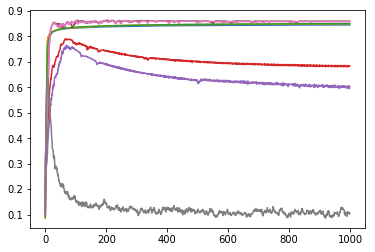

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
smooth_bridge_faultless = []
smooth_bridge_b2 = []
smooth_dgd_faultless = []
smooth_krum_faultless = []
smooth_bulyan_faultless = []
smooth_dgd_b2 = []
smooth_krum_b2 = []
smooth_bulyan_b2 = []
smooth_byrdie_faultless = []

for test_round in range(10):
    with open('./ByRDiE/ByRDiE_faultless_9%d.pickle'%test_round, 'rb') as handle:       
        smooth_byrdie_faultless.append(pickle.load(handle, encoding='latin1'))

for test_round in range(10):
    with open('./BRIDGE/result_BRIDGE_faultless%d.pickle'%test_round, 'rb') as handle:       
        smooth_bridge_faultless.append(pickle.load(handle))
for test_round in range(10):
    with open('./BRIDGE/result_BRIDGE_b2_%d.pickle'%test_round, 'rb') as handle:       
        smooth_bridge_b2.append(pickle.load(handle))
for test_round in range(10):
    with open('./DGD/result_DGD_faultless%d.pickle'%test_round, 'rb') as handle:       
        smooth_dgd_faultless.append(pickle.load(handle))
for test_round in range(10):
    with open('./DGD/result_DGD_b2_%d.pickle'%test_round, 'rb') as handle:       
        smooth_dgd_b2.append(pickle.load(handle))
for test_round in range(50):
    with open('./Krum/result_krum_faultless_%d.pickle'%test_round, 'rb') as handle:       
        smooth_krum_faultless.append(pickle.load(handle))
for test_round in range(40):
    with open('./Krum/result_krum_b2_%d.pickle'%test_round, 'rb') as handle:       
        smooth_krum_b2.append(pickle.load(handle))
for test_round in range(40):
    with open('./Bulyan/result_bulyan_faultless_%d.pickle'%test_round, 'rb') as handle:       
        smooth_bulyan_faultless.append(pickle.load(handle))
for test_round in range(30):
    with open('./Bulyan/result_bulyan_b2_%d.pickle'%test_round, 'rb') as handle:       
        smooth_bulyan_b2.append(pickle.load(handle))
        
        
byrdie_faultless = np.mean(smooth_byrdie_faultless, axis=0)
byrdie_faultless = np.mean(byrdie_faultless, axis=1)
bridge_faultless = np.mean(smooth_bridge_faultless, axis=0)
bridge_b2 = np.mean(smooth_bridge_b2, axis=0)
dgd_faultless = np.mean(smooth_dgd_faultless, axis=0)
dgd_b2 = np.mean(smooth_dgd_b2, axis=0)
krum_faultless = np.mean(smooth_krum_faultless, axis=0)
krum_b2 = np.mean(smooth_krum_b2, axis=0)
bulyan_faultless = np.mean(smooth_bulyan_faultless, axis=0)
bulyan_b2 = np.mean(smooth_bulyan_b2, axis=0)
plt.plot(bridge_faultless)
plt.plot(bridge_b2)
plt.plot(dgd_faultless)
plt.plot(krum_faultless)
plt.plot(krum_b2)
plt.plot(bulyan_faultless)
plt.plot(bulyan_b2)
plt.plot(dgd_b2)
plt.show()

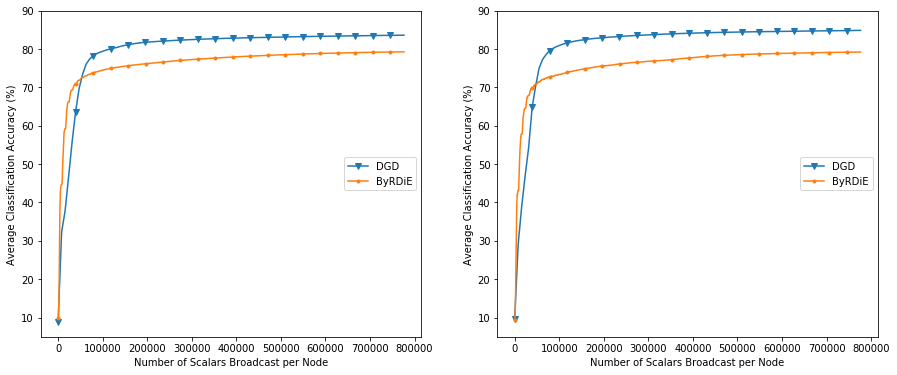

In [1]:
#plot

import pickle
import matplotlib.pyplot as plt
import numpy as np

smooth_dgd_b2 = []
smooth_dgd_faultless = []
smooth_byrdie_faultless = []

for test_round in range(10):
    with open('../result/DGD/result_DGD_b2_%d.pickle'%test_round, 'rb') as handle:       
        smooth_dgd_b2.append(pickle.load(handle))

dgd_b2 = np.mean(smooth_dgd_b2, axis=0)

for test_round in range(10):
    with open('./DGD/result_DGD_faultless%d.pickle'%test_round, 'rb') as handle:       
        smooth_dgd_faultless.append(pickle.load(handle))

dgd_faultless = np.mean(smooth_dgd_faultless, axis=0)
        

DGD_axis = [7840 * t  for t in range(100)]
    
with open('./ByRDiE/ByRDiE_faultless_93.pickle', 'rb') as handle:
    ByRDiE_b4 = pickle.load(handle, encoding='latin1') 

ByRDiE_b4 = np.mean(ByRDiE_b4, axis = 1)

for test_round in range(10):
    with open('./ByRDiE/ByRDiE_faultless_9%d.pickle'%test_round, 'rb') as handle:       
        smooth_byrdie_faultless.append(pickle.load(handle, encoding='latin1'))


byrdie_faultless = np.mean(smooth_byrdie_faultless, axis = 0)
byrdie_faultless = np.mean(byrdie_faultless, axis = 1)


    
byrdie_axis_200 = []
for t in range(100):
    for p in range(39):
        byrdie_axis_200.append(t * 7840 + (p+1) * 200)
    for p in range(10):
        byrdie_axis_200.append((t+1) * 7840 + p)
        
DGD_axis = [7840 * t  for t in range(100)]

    
byrdie_axis_b1 = []
for t in range(100):
    for p in range(39):
        byrdie_axis_b1.append(t * 7840 + (p+1) * 200)
    for p in range(10, 11):
        byrdie_axis_b1.append((t+1) * 7840 + p)

        
f = plt.figure(1)
f.set_figheight(6)
f.set_figwidth(15)

plot_b0 = plt.subplot(1,2,1)
plt.plot(DGD_axis[:100], np.array(dgd_faultless[:100]) * 100, marker = 'v', markevery = 5)
plt.plot(byrdie_axis_b1[:3960], np.array(byrdie_faultless) * 100, marker = '.', markevery = 200)
# plt.plot(DGD_axis[:100], np.array(bridge_faultless[:100]) * 100, marker = 'p', markevery = 5)
# plt.plot(DGD_axis[:100], np.array(median_faultless[:100]) * 100, marker = 's', markevery = 5)
# plt.plot(DGD_axis[:100], np.array(krum_faultless[:100]) * 100, marker = '*', markevery = 5)
# plt.plot(DGD_axis[:100], np.array(bulyan_faultless[:100]) * 100, marker = 'x', markevery = 5)
plt.xlabel('Number of Scalars Broadcast per Node')
plt.ylim(5,90)
plt.ylabel('Average Classification Accuracy (%)')
plt.legend(['DGD', 'ByRDiE', 'BRIDGE-T', 'BRIDGE-M', 'BRIDGE-K', 'BRIDGE-B'], loc = 'right')
# plot_b0.set_title('Network with no Byzantine node', y=-0.15)


plot_b2 = plt.subplot(1,2,2)
plt.plot(DGD_axis[:100], np.array(dgd_b2[:100]) * 100, marker = 'v', markevery = 5)
plt.plot(byrdie_axis_b1[:3960], np.array(ByRDiE_b4) * 100, marker = '.', markevery = 200)
# plt.plot(DGD_axis[:100], np.array(bridge_b2[:100]) * 100, marker = 'p', markevery = 5)
# plt.plot(DGD_axis[:100], np.array(median_b4[:100]) * 100, marker = 's', markevery = 5)
# plt.plot(DGD_axis[:100], np.array(krum_b2[:100]) * 100, marker = '*', markevery = 5)
# plt.plot(DGD_axis[:100], np.array(bulyan_b2[:100]) * 100, marker = 'x', markevery = 5)
plt.xlabel('Number of Scalars Broadcast per Node')
plt.ylim(5,90)
plt.ylabel('Average Classification Accuracy (%)')
plt.legend(['DGD', 'ByRDiE', 'BRIDGE-T', 'BRIDGE-M', 'BRIDGE-K', 'BRIDGE-B'], loc = 'right')
# plot_b2.set_title('Network with 2 Byzantine nodes', y=-0.15)

plt.show()

In [18]:
for test_round in range(10):
    with open('./ByRDiE/ByRDiE_faultless_9%d.pickle'%test_round, 'rb') as handle:       
        smooth_byrdie_faultless.append(pickle.load(handle, encoding='latin1'))
print('Shape of list with 10 monte-carlos {}'.format(len(smooth_byrdie_faultless)))

Shape of list with 10 monte-carlos 20


In [23]:
with open('./ByRDiE/ByRDiE_faultless_90.pickle','rb') as handle:
    byrdie_faultless_monte0=pickle.load(handle, encoding='latin1')

In [24]:
type(byrdie_faultless_monte0)

list

In [30]:
len(byrdie_faultless_monte0)

3960

In [31]:
byrdie_faultless_monte0[3959]

[0.8046,
 0.8059,
 0.8047,
 0.7958,
 0.8007,
 0.795,
 0.7956,
 0.8047,
 0.8062,
 0.8006,
 0.7898,
 0.8052,
 0.7962,
 0.7985,
 0.77,
 0.8014,
 0.8067,
 0.7947,
 0.7901,
 0.7996]

In [10]:
with open('./ByRDiE/ByRDiE_faultless_0.pickle', 'rb') as handle:
    ByRDiE_faultless = pickle.load(handle)
    
ByRDiE_faultless = np.asarray(ByRDiE_faultless)
ByRDiE_faultless.shape

(4000, 20)

In [13]:
np.mean(ByRDiE_faultless,axis=1).shape

(4000,)